# Combined Cycle Power Plant- Assignment

## Step 1: Import Libraries

First the libraries are imported

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Step 2: Reading and Understanding the Data

Read the Combined Cycle Power Plant Data

In [2]:
dt=pd.read_csv("Folds5x2_pp.csv") #Reading the data

In [4]:
dt.info()  #Getting the info- type of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of 

Hourly average ambient variables Temperature (T)

Ambient Pressure (AP)

Relative Humidity (RH) and 

Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [5]:
dt.isnull().sum() #checking whether there are any unfilled data

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
dt.describe() #describing the data

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


energy=energy.astype(int) #The dataset consists of 4 hourly average variables or features and the target variable which is the Output Power (PE)

Ambient Temperature (AT) in the range 1.81°C and 37.11°C

Ambient Pressure (AP) in the range 992.89–1033.30 millibar

Relative Humidity (RH) in the range of 25.56% to 100.16%

Exhaust Vacuum (V) in the range 25.36–81.56 cm Hg

Net hourly electrical energy output (PE) 420.26–495.76 MW

In [7]:
dt=dt.astype(int) #Converting the type to integer

## Step 3: Visualising the Data

Now we visualize the bivariate distribution of the dataset that shows how each feature correlates to each other and the PE.

Through this we can identify if some predictors have a strong association with the Outupt variable and if some mulitcollinearity is present 

We use `matplotlib` and `seaborn`to visualize the data

<function matplotlib.pyplot.show(close=None, block=None)>

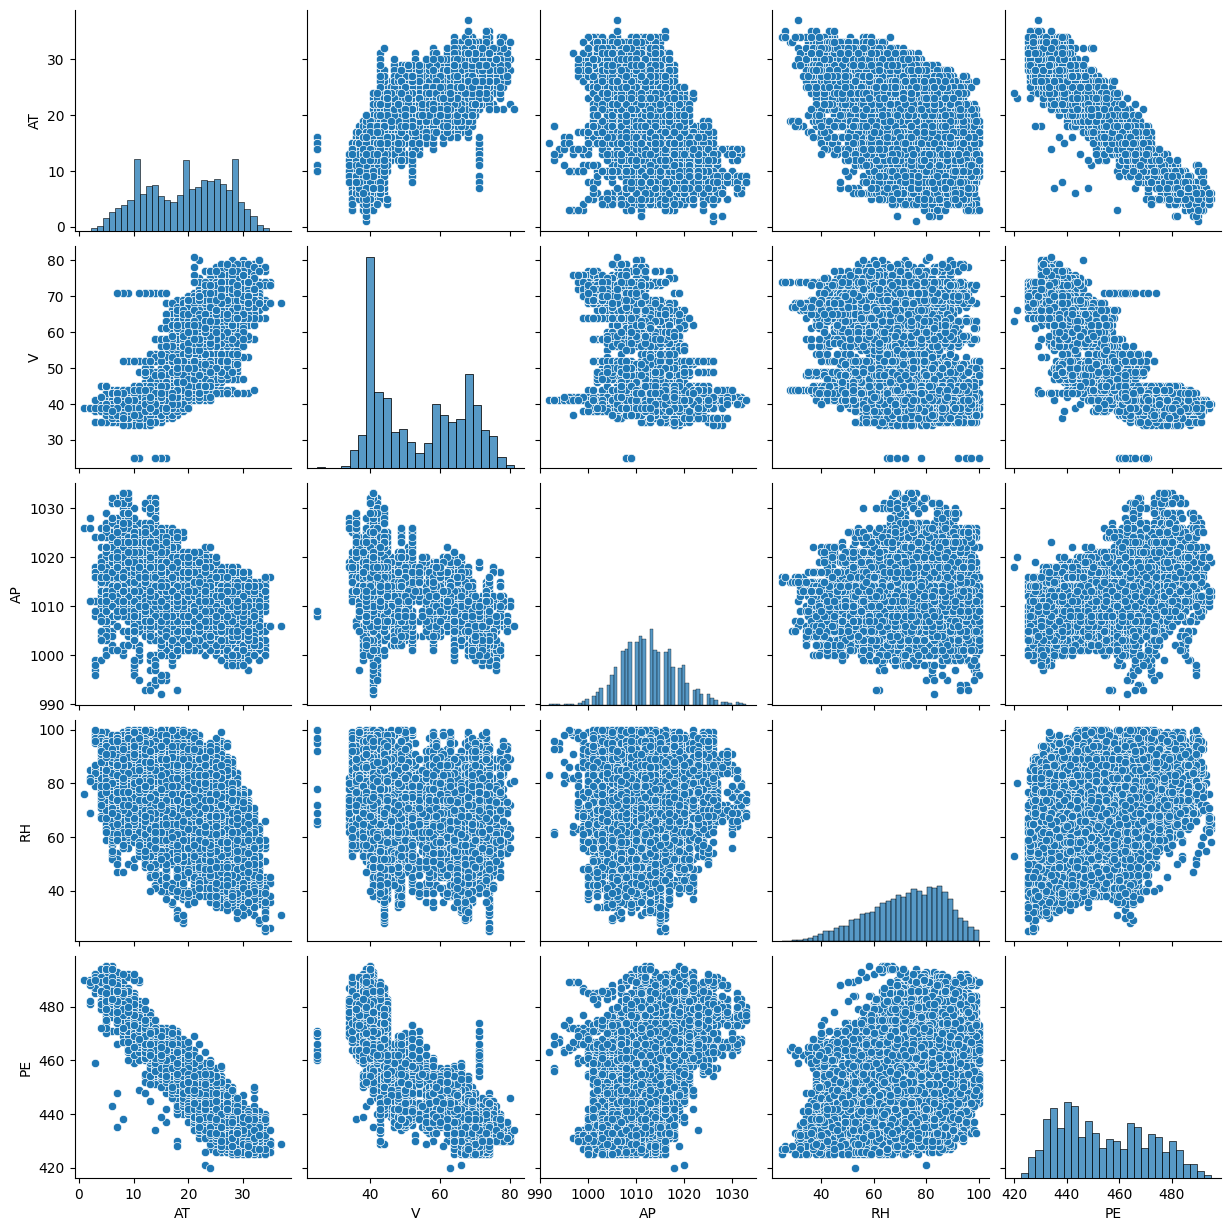

In [8]:
sns.pairplot(dt)  
plt.show   #plotting how each feature correlates to each other and the PE

When we visualized we can see that there is a strog negative correlation seen on AT and V in relation to PE. Also it is  noticed that AT and V are highly correlated with each other. It will be checked whether to exclude one of the variable.




#### A correlation matrix is used to know the impact of features on the output. To do this we plot the heatmap of the correlation matrix using Seaborn

<Axes: >

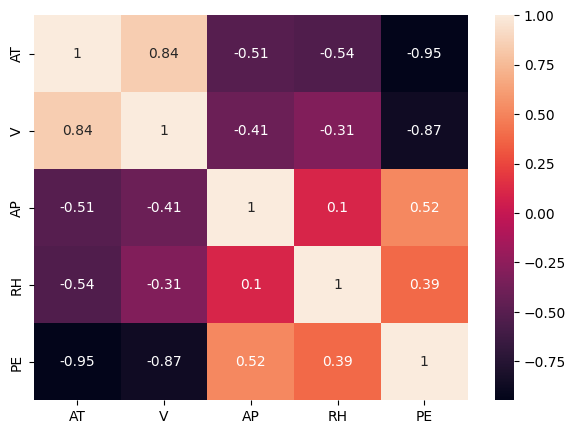

In [9]:
plt.figure(figsize = (7, 5))
sns.heatmap(dt.corr(), annot = True)  #Plotting the heat map to check the correlation coffecients

From the correlation matrix, we can see that AT and V have a strong negative correlation with the variable PE and  their correlation coefficients are -0.95 and -0.87 respectively. AP and RH have a weak positive correlation with PE with correlation coefficients of 0.52 and 0.39 respectively.

## Step4: Pairwise scatterplots of each predictor variables in the dataset with the dependent variable-PE

<Axes: xlabel='AT', ylabel='PE'>

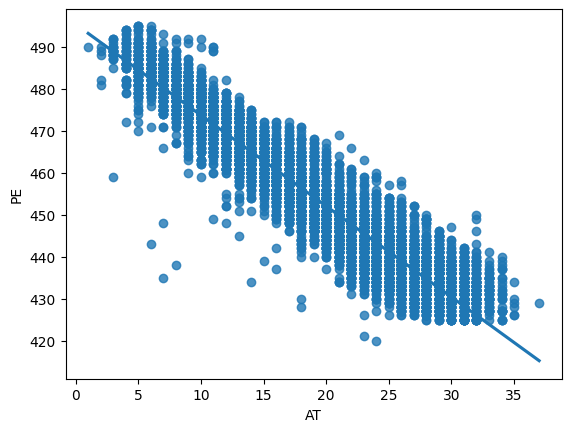

In [10]:
sns.regplot(x='AT', y='PE', data=dt) # Plotting AT vs PE

<Axes: xlabel='V', ylabel='PE'>

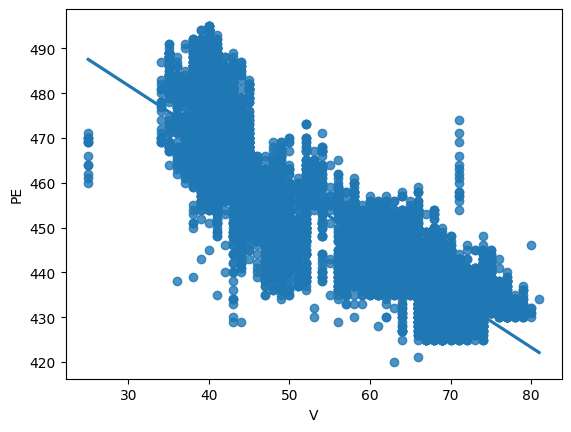

In [11]:
sns.regplot(x='V', y='PE', data=dt)  # Plotting V vs PE

<Axes: xlabel='AP', ylabel='PE'>

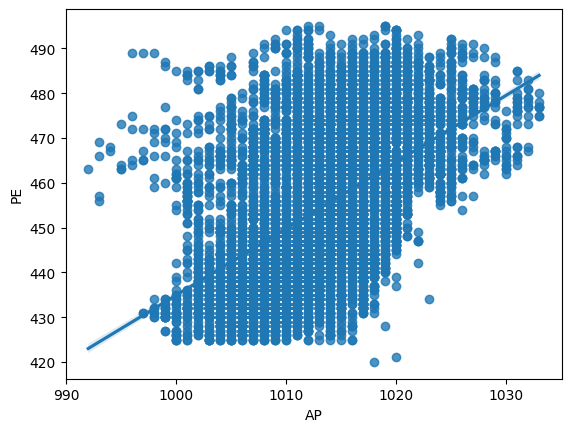

In [12]:
sns.regplot(x='AP', y='PE', data=dt) # Plotting AP vs PE

<Axes: xlabel='RH', ylabel='PE'>

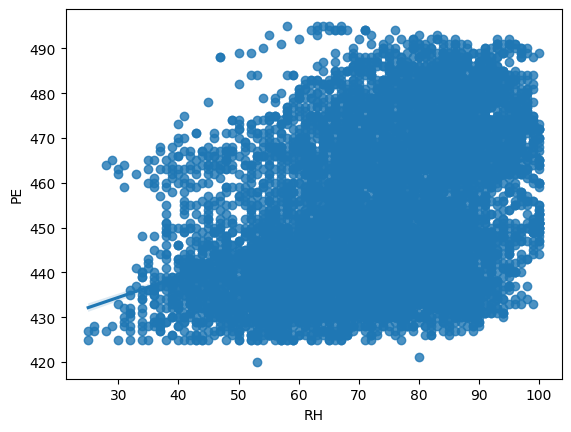

In [13]:
sns.regplot(x='RH', y='PE', data=dt) # Plotting RH vs PE

When visualized we can easily see that there is a negative correlation seen on AT and V in relation to PE

From the Scatter Plots we are assuming that all the features are in linear relationship with the dependent variable PE. There is a correlation between AT and V. It will be verified by checking the VIF value and a decision will be taken to consider which feature to be selected for building the model

## Step 5: Splitting the Data into Training and Testing Sets

The first step of regression is to perform a train-test split

In [14]:
dt_train, dt_test = train_test_split(dt, train_size = 0.7, test_size = 0.3, random_state = 50) #splitting the test and train data

In [15]:
print(dt_train.shape)
print(dt_test.shape) #identifying the size of the train and test data

(6697, 5)
(2871, 5)


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()       #defining the scaling function 

In [18]:
num_vars = ['AT', 'V', 'AP', 'RH', 'PE']

dt_train[num_vars] = scaler.fit_transform(dt_train[num_vars])   #scaling the train data

In [19]:
dt_train.head() #printing the data after scaling

,AT,V,AP,RH,PE
8982,0.222222,0.196429,0.756098,0.773333,0.733333
839,0.583333,0.678571,0.487805,0.760000,0.373333
7000,0.472222,0.660714,0.682927,0.706667,0.440000
7266,0.861111,0.857143,0.414634,0.200000,0.106667
1844,0.472222,0.250000,0.317073,0.720000,0.640000


<Axes: >

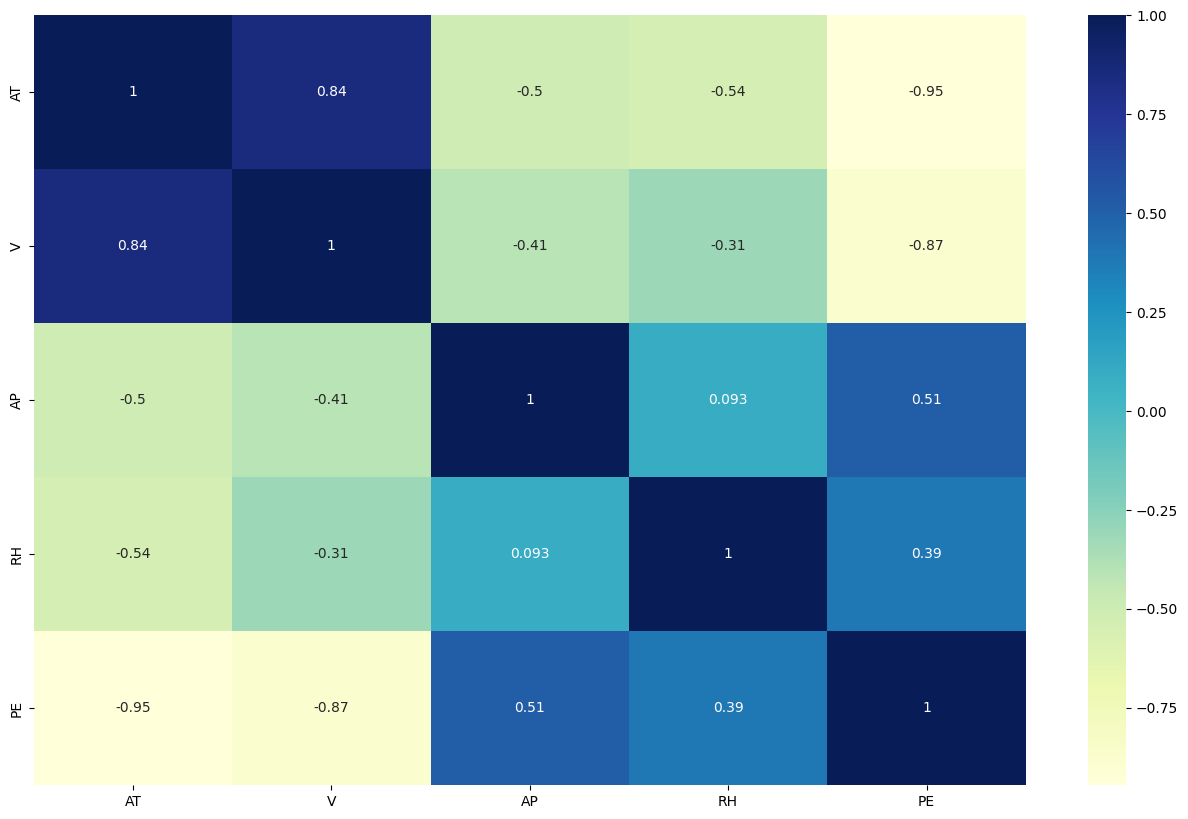

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(dt_train.corr(), annot = True, cmap="YlGnBu")   #Plotting the heatmap to check the correlation coffecients of train data

### Dividing into X and Y sets for the model building

In [22]:
y_train = dt_train.pop('PE')
X_train = dt_train                             #Dividing to X_Train and y_train for building the model

## Step 6: Building a linear model

Building the model using `statsmodels

As there are only 4 features we will try to create the model considering 4 different combinations of features.

First we will select only AT as the predictor as it is having the strongest correlation with the target variable- PE

In [23]:
# Adding a constant
X_train_lm1 = sm.add_constant(X_train[['AT']])

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [24]:
lr1.params  # Check the coefficients obtained

const    0.975352
AT      -1.038862
dtype: float64

In [25]:
lr1.summary()  #Printing the summary after building the model using the feature 'AT'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 5.748e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:48:56   Log-Likelihood:                 7978.5
No. Observations:                6697   AIC:                        -1.595e+04
Df Residuals:                    6695   BIC:                        -1.594e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9754      0.002    412.945      0.000       0.971       0.980
AT            -1.0389      0.004   -239.755      0.000      -1.047      -1.030
==============================================================================
Omnibus:                      421.795   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1305.088
Skew:                          -0.298   Prob(JB):                    4.02e-284
Kurtosis:                       5.079   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

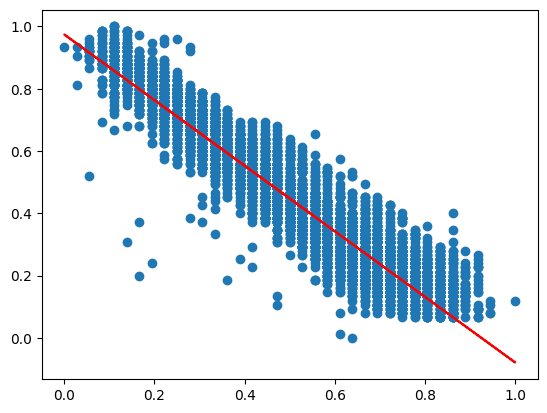

In [26]:
#Visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm1.iloc[:, 1], y_train)
plt.plot(X_train_lm1.iloc[:, 1], 0.97430 -1.053*X_train_lm1.iloc[:, 1], 'r')
plt.show()

### Adding another variable- 'Exhaust Vaccum'

The R-squared value obtained is `0.898`. AS we are having 4 variables, we can explore and try to find a better value than this by adding one more feature. So let's go ahead and add the second most highly correlated variable, i.e. `V-Exhaust Vaccum`.

In [27]:
X_train_lm2 = X_train[['AT', 'V']] #Creating the model by considering 'AT' and 'V'

In [28]:
# Build the linear model

import statsmodels.api as sm
X_train_lm2 = sm.add_constant(X_train_lm2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [29]:
lr2.params  #Printing the coefficients of the model built by considering the two feature 'AT' and 'V'

const    0.987686
AT      -0.804480
V       -0.253806
dtype: float64

In [30]:
lr2.summary()  #Printing the summary after building the model using the feature 'AT' & 'V'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 3.560e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:49:01   Log-Likelihood:                 8627.3
No. Observations:                6697   AIC:                        -1.725e+04
Df Residuals:                    6694   BIC:                        -1.723e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9877      0.002    455.439      0.000       0.983       0.992
AT            -0.8045      0.007   -109.628      0.000      -0.819      -0.790
V             -0.2538      0.007    -37.833      0.000      -0.267      -0.241
==============================================================================
Omnibus:                      544.612   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2267.437
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       5.783   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assign the feature Relative Humidity-AP

In [31]:
X_train_lm3 = X_train[['AT', 'V', 'AP']]  #Creating the model by considering 'AT','V' and 'AP'

In [32]:
# Build a linear model

import statsmodels.api as sm
X_train_lm3 = sm.add_constant(X_train_lm3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [33]:
lr3.params  #Printing the coefficients of the model built by considering the two feature 'AT', 'V', 'AP'

const    0.927728
AT      -0.770691
V       -0.256888
AP       0.088057
dtype: float64

In [34]:
lr3.summary()  #Printing the summary after building the model using the feature 'AT','V' & 'AP'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 2.445e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:49:05   Log-Likelihood:                 8719.4
No. Observations:                6697   AIC:                        -1.743e+04
Df Residuals:                    6693   BIC:                        -1.740e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9277      0.005    190.020      0.000       0.918       0.937
AT            -0.7707      0.008   -100.751      0.000      -0.786      -0.756
V             -0.2569      0.007    -38.797      0.000      -0.270      -0.244
AP             0.0881      0.006     13.662      0.000       0.075       0.101
==============================================================================
Omnibus:                      570.107   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2462.828
Skew:                          -0.319   Prob(JB):                         0.00
Kurtosis:                       5.901   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assign the feature Relative Humidity- adding all the variables

In [35]:
X_train_lm4 = X_train[['AT', 'V','AP', 'RH']]

In [36]:
# Build a linear model

import statsmodels.api as sm
X_train_lm4 = sm.add_constant(X_train_lm4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [37]:
lr4.params

const    1.096737
AT      -0.929130
V       -0.189565
AP       0.035938
RH      -0.152745
dtype: float64

In [38]:
lr4.summary()  #Printing the summary after building the model using the feature 'AT'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.108e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:49:10   Log-Likelihood:                 9150.2
No. Observations:                6697   AIC:                        -1.829e+04
Df Residuals:                    6692   BIC:                        -1.826e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0967      0.007    152.016      0.000       1.083       1.111
AT            -0.9291      0.009   -104.682      0.000      -0.947      -0.912
V             -0.1896      0.007    -28.746      0.000      -0.202      -0.177
AP             0.0359      0.006      5.719      0.000       0.024       0.048
RH            -0.1527      0.005    -30.312      0.000      -0.163      -0.143
==============================================================================
Omnibus:                      892.386   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4998.255
Skew:                          -0.511   Prob(JB):                         0.00
Kurtosis:                       7.107   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Print a summary of the linear regression model obtained

In [39]:
print(lr4.summary()) #Printing the summary of the model we built

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.108e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:49:12   Log-Likelihood:                 9150.2
No. Observations:                6697   AIC:                        -1.829e+04
Df Residuals:                    6692   BIC:                        -1.826e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0967      0.007    152.016      0.0

## Step 7: Residual Analysis of the train data

So, now we are checking if the error terms are also normally distributed 

In [40]:
y_train_pe = lr4.predict(X_train_lm4) #Predicting on the trained data

Text(0.5, 0, 'Errors')

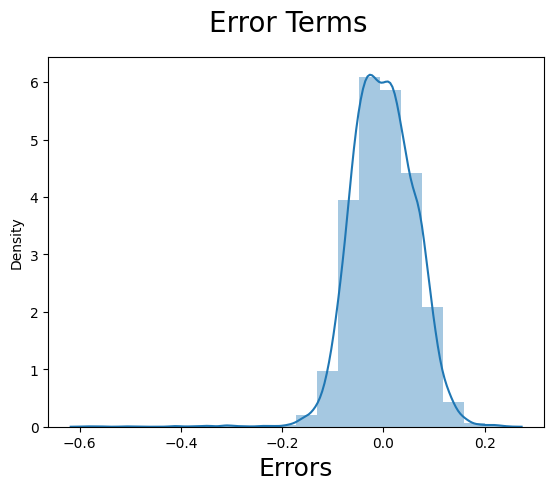

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pe), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

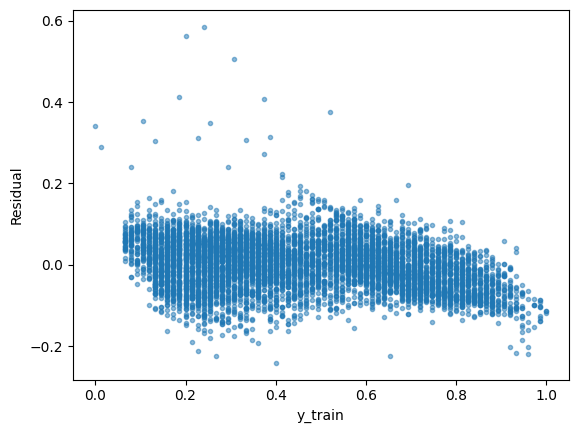

In [42]:
residuals = y_train_pe - y_train
plt.plot(y_train, residuals, ".", alpha=0.5)
plt.xlabel("y_train") 
plt.ylabel("Residual");  #printing the residuals with respect to y_pred

## Step 8: Making Predictions Using the Final Model

We had fitted the model and checked the normality of error terms

The error curve is following the normal distribution

Now making the predictions using the final, i.e. fourth model.

In [44]:
num_vars = ['AT', 'V', 'AP', 'RH', 'PE']

dt_test[num_vars] = scaler.fit_transform(dt_test[num_vars])   #Scalling the test data

In [46]:
dt_test.head() #Checking the data after scaling

,AT,V,AP,RH,PE
3626,0.424242,0.345455,0.794872,0.633803,0.500000
3111,0.939394,0.872727,0.487179,0.183099,0.200000
9031,0.636364,0.600000,0.564103,0.394366,0.300000
7899,0.818182,0.800000,0.410256,0.507042,0.242857
2975,0.424242,0.327273,0.692308,0.605634,0.500000


In [47]:
dt_test.describe()

,AT,V,AP,RH,PE
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,0.520598,0.524499,0.483786,0.616986,0.412400
std,0.225835,0.231069,0.153751,0.204548,0.243732
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.290909,0.358974,0.478873,0.200000
50%,0.545455,0.490909,0.487179,0.633803,0.371429
75%,0.696970,0.745455,0.589744,0.774648,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [48]:
y_test = dt_test.pop('PE')
X_test = dt_test                      #Dividing to X_test and y_test for testing the data

In [49]:
X_test_m4 = sm.add_constant(X_test)        # Adding constant variable to test dataframe

In [50]:
y_pred_m4 = lr4.predict(X_test_m4)         # Making predictions using the fourth model

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

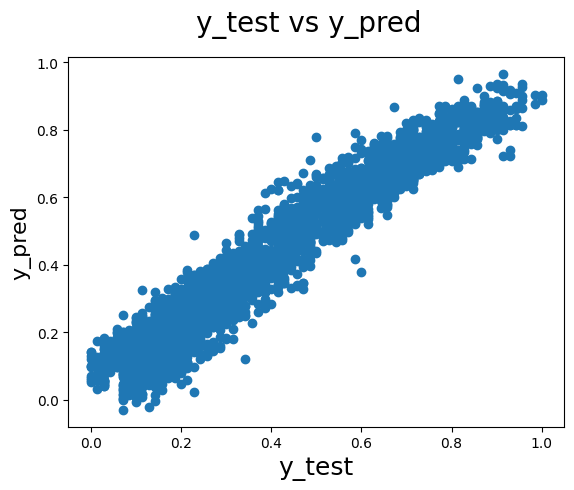

In [51]:

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

####  Root Mean Squared Error (RMSE): measures the average error performed by the model in predicting the outcome for an observation.

In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_m4)
rmse = np.sqrt(mse)
rmse

0.06920175911914185

The lower the RMSE score the better

#### R-Squared: It means how much of the variation in the target variable that can be explained by the set of features used in training the model.

In [53]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_m4)
r_squared

0.9193580002083885

The higher the R-squared score the better

#### Mean Absolute Error: measures how far predicted values are away from the actual values.

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred_m4)
mae

0.056494959695280934

The lower the MAE value the better

## The equation of the best fitted lines using Multi Linear Regression is

#### Energy Output (EP)= 1.0967 + (-0.9291)* (Temperature(AT)) + (-0.1896)* (Exhaust Vacuum (V)) + 0.0359*(Ambient Pressure (AP))+ (-0.1527)* (Relative Humidity (RH))





#### The same model is build using RFE



## Model Selection using RFE


In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# Running RFE with the output number of the variable equal to 4
lm = LinearRegression()

# Choose the number of features you want to retain (in this case, 4)
num_features_to_select = 4

# Initialize RFE with the linear regression model and the number of features to retain
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)

# Fit RFE to your training data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('AT', True, 1), ('V', True, 1), ('AP', True, 1), ('RH', True, 1)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['AT', 'V', 'AP', 'RH'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [60]:
X_train_rfe = X_train[col]

In [61]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [62]:
lm5 = sm.OLS(y_train,X_train_rfe).fit()

In [63]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.108e+04
Date:                Tue, 28 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:54:19   Log-Likelihood:                 9150.2
No. Observations:                6697   AIC:                        -1.829e+04
Df Residuals:                    6692   BIC:                        -1.826e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0967      0.007    152.016      0.0

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [64]:
y_train_price = lm5.predict(X_train_rfe)

In [65]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

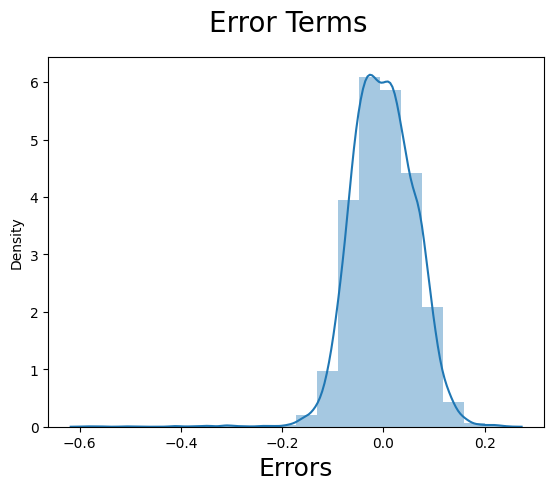

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#### Dividing into X_test and y_test

In [67]:
y_pred_m5 = lm5.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

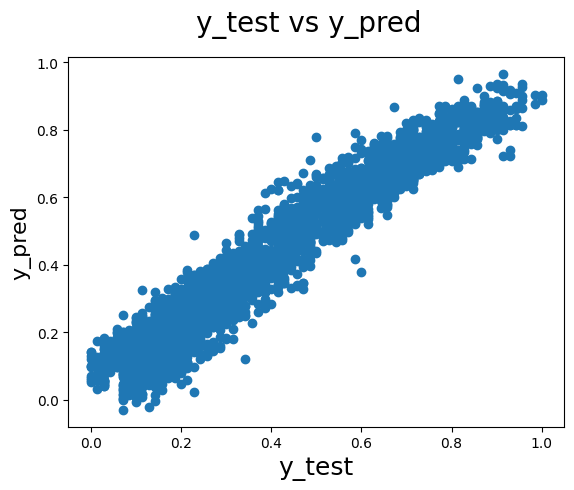

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

### The equation of the best fitted lines using Multi Linear Regression through RFE is also nearly similar

#### Energy Output (EP)= 1.0967 + (-0.9291)* (Temperature(AT)) + (-0.1896)* (Exhaust Vacuum (V)) + 0.0359*(Ambient Pressure (AP))+ (-0.1527)* (Relative Humidity (RH))